# ***ADSORPTION USING AIIDALAB***


***Q1. Three types of calculations AiiDAlab offers for adsorption studies***

*Single-component adsorption isotherms* :
These are the fundamental calculations in adsorption studies and describe how much of a gas is taken up by a porous material at a constant temperature as the pressure increases. They provide direct information about adsorption capacity, the affinity of the material for the adsorbate, and the pressure range where uptake occurs. In AiiDAlab, these isotherms can be fitted to models such as Langmuir, BET, or Toth, allowing one to extract useful parameters that summarize adsorption behavior.

*Mixture adsorption via IAST (Ideal Adsorbed Solution Theory)*: 
Real-world separations typically involve mixtures of gases rather than pure components. IAST is a predictive framework that uses single-component isotherms as input to estimate how different gases will compete for adsorption sites. With this method, AiiDAlab can calculate mixture uptake and separation selectivity without the need for costly multicomponent simulations or experiments. This makes it especially useful for applications like CO₂ capture from flue gas or natural gas purification.

*Isosteric heat of adsorption*: 
This thermodynamic property measures the energy released when a gas molecule adsorbs into a porous material. AiiDAlab evaluates it by comparing isotherms collected at multiple temperatures and applying relations such as Clausius–Clapeyron. The isosteric heat reflects the strength of interaction between gas and material, and it highlights how this strength changes with loading. This information is crucial for balancing high uptake with energy-efficient regeneration in processes such as carbon capture.

***Q2. Physical properties of IRMOF-1***

The structural properties of porous crystalline materials can be quantified using probe-based simulations. Parameters such as density, accessible surface area (ASA), probe-occupiable accessible volume (POAV), and porosity provide insight into the material’s packing, internal voids, and potential for adsorption or diffusion. Here, the properties are presented for the studied material IRMOF-1, using a spherical probe of radius 1.525 Å.

**Results**

1. *Density*

* *Value:* 0.576983 g·cm⁻³
* *Description:* Density is the mass per unit volume of the framework. A relatively low density indicates a large void fraction, characteristic of porous solids.

2. *Accessible Surface Area (ASA)*

* *Value:* 3.96465 × 10³ Å² 
* *Description:* ASA represents the total surface area that a spherical probe (radius = 1.525 Å) can reach when “rolling” over the atomic framework. It quantifies the extent of internal surface available for adsorption or interaction with guest molecules.

3. *Probe-Occupiable Accessible Volume (POAV)*

* *Value:* 1.37374 × 10⁴ Å³ (equivalently 1.34316 cm³·g⁻¹)
* *Description:* POAV is the fraction of the unit cell volume that can be occupied by the **center** of the probe without overlap with the atoms. This defines the accessible pore volume available for potential guest species.

4. *Porosity*

* *Value:* 0.775 (≈ 77.5 %)
* *Description:* Porosity is calculated as the ratio of POAV to the total unit cell volume. For this material:

  $$
  \text{Porosity} = \frac{\text{POAV}}{\text{Unit cell volume}} = \frac{13737.4 \,\text{Å}^3}{17726.2 \,\text{Å}^3} \approx 0.775
  $$

  This indicates that approximately three-quarters of the unit cell is available as free volume accessible to the probe.

***Q3. Henry coefficients***

The Henry coefficient is a fundamental thermodynamic parameter that describes the proportionality between the concentration of a species in one phase and its partial pressure (or concentration) in another.

* *General definition:* In solution thermodynamics, Henry’s law states that the amount of gas dissolved in a liquid is proportional to its partial pressure in the gas phase, with the proportionality constant known as the Henry coefficient.
* *Applied to porous materials:* In adsorption studies, the Henry coefficient corresponds to the initial slope of the adsorption isotherm at very low pressure. It quantifies the affinity of an adsorbent toward a given gas molecule in the infinite dilution regime.

In this work, the Henry coefficients of CO₂ and CH₄ were calculated at 300 K.



***Results***

1. **CH₄ (Methane)**

* *Henry coefficient (average):* 1.12 × 10⁻⁶ mol·kg⁻¹·Pa⁻¹
* *Deviation:* 2.34 × 10⁻⁹ mol·kg⁻¹·Pa⁻¹

2. **CO₂ (Carbon Dioxide)**

* *Henry coefficient (average):* 4.95 × 10⁻⁶ mol·kg⁻¹·Pa⁻¹
* *Deviation:* 1.33 × 10⁻⁸ mol·kg⁻¹·Pa⁻¹

***Discussion***

* CO₂ shows a Henry coefficient about *4.5 times higher* than CH₄.
* This indicates that, at low pressure, CO₂ molecules are more strongly adsorbed by the framework than CH₄ molecules.
* The difference can be explained by molecular properties: CO₂ has a significant quadrupole moment and higher polarizability, resulting in stronger interactions with pore walls. CH₄, being non-polar, interacts mainly via weak dispersion forces.
* Thus, the material exhibits a *clear preferential affinity for CO₂*.


***Conclusion***

The Henry coefficient analysis confirms that the material favors adsorption of CO₂ over CH₄, making it suitable for **CO₂/CH₄ separation processes** such as biogas purification or natural gas upgrading.


***Q4. Pure isotherms for CH4 and CO2***

Because the original CSV files contained multiple computed properties in a nested format, a data cleaning step was necessary before plotting. By converting the “isotherm” entry into a dictionary, retaining only the pressure and loading arrays, and reorganizing them into simple tabular columns, it became possible to produce clear adsorption isotherm plots.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd

df_ch4 = pd.read_csv("CH4_isotherm.csv")
df_co2 = pd.read_csv("CO2_isotherm.csv")

In [50]:
import pandas as pd
from ast import literal_eval


iso_dict = literal_eval(df_ch4[df_ch4["Key"] == "isotherm"]["Value"].values[0])


df_iso_ch4 = pd.DataFrame({
    "Pressure(bar)": iso_dict["pressure"],
    "Loading(mmol/g)": [val for val in iso_dict["loading_absolute_average"]]  
})

print(df_iso_ch4.head())


   Pressure(bar)  Loading(mmol/g)
0            0.2         0.021624
1            0.8         0.088217
2            1.4         0.159387
3            2.0         0.217408
4            2.6         0.285007


To transform this into a usable dataset for plotting, the following steps were performed:

1. **Extract the isotherm entry**

   * Using *pandas*, the CSV was read into a DataFrame.
   * The row with the key *“isotherm”* was isolated.
   * Its value was stored as a string representation of a dictionary.

2. **Convert string to dictionary**

   * With Python’s `literal_eval`, the string was converted into a proper dictionary object containing pressure and loading arrays.

3. **Keep only the relevant data**

   * From the dictionary, only the **pressure** and **loading_absolute_average** fields were retained, since these are the variables needed to plot adsorption isotherms.

4. **Transform into columns**

   * A new DataFrame was constructed with two columns:

     * *Pressure (bar)*
   

5. **Plotting**

   * Using *matplotlib*, the data were plotted as adsorption isotherms.
   * Each curve shows the uptake of gas (y-axis) as a function of pressure (x-axis).
   * The procedure was applied separately for CH₄ and CO₂.

All these steps were perfomed for both CO2 and CH4 and the pure isotherms can be found plotted below. 


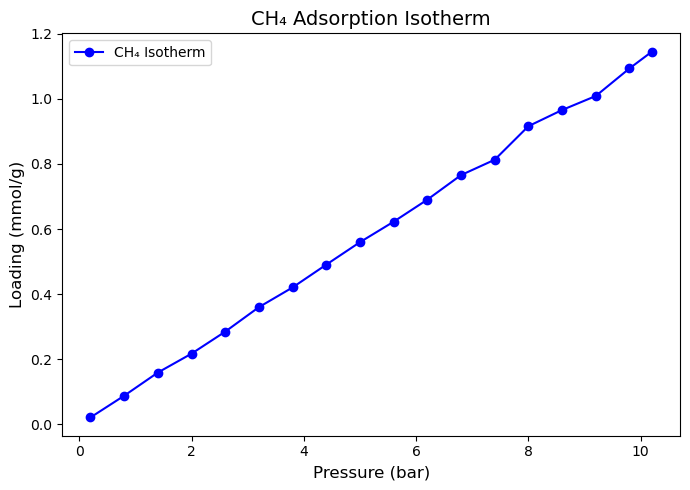

In [51]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,5))
plt.plot(df_iso_ch4["Pressure(bar)"], df_iso_ch4["Loading(mmol/g)"], 
         marker="o", linestyle="-", color="b", label="CH₄ Isotherm")

plt.xlabel("Pressure (bar)", fontsize=12)
plt.ylabel("Loading (mmol/g)", fontsize=12)
plt.title("CH₄ Adsorption Isotherm", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [52]:
import pandas as pd
from ast import literal_eval


iso_dict = literal_eval(df_co2[df_co2["Key"] == "isotherm"]["Value"].values[0])


df_iso_co2 = pd.DataFrame({
    "Pressure(bar)": iso_dict["pressure"],
    "Loading(mmol/g)": [val for val in iso_dict["loading_absolute_average"]] 
})

print(df_iso_co2.head())

   Pressure(bar)  Loading(mmol/g)
0            0.2         0.102795
1            0.8         0.396212
2            1.4         0.708200
3            2.0         1.043533
4            2.6         1.401530


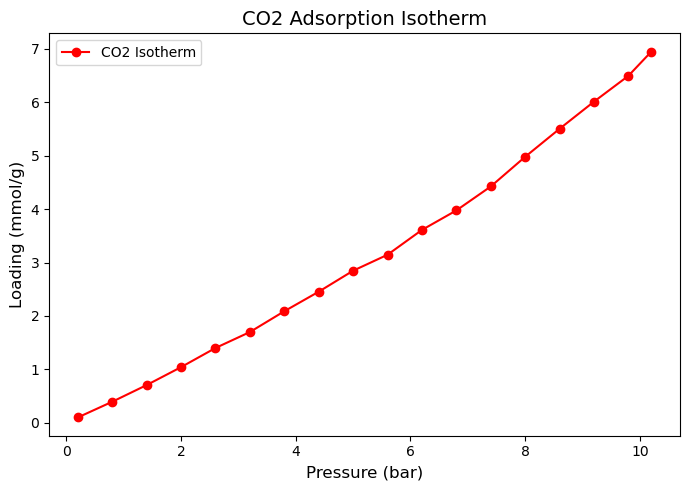

In [53]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,5))
plt.plot(df_iso_co2["Pressure(bar)"], df_iso_co2["Loading(mmol/g)"], 
         marker="o", linestyle="-", color="r", label="CO2 Isotherm")

plt.xlabel("Pressure (bar)", fontsize=12)
plt.ylabel("Loading (mmol/g)", fontsize=12)
plt.title("CO2 Adsorption Isotherm", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


***Q5- Binary mixture isotherm***


In realistic conditions, CH₄ and CO₂ are adsorbed **simultaneously** in porous materials. To predict mixture adsorption behavior from pure-component data, one widely used approach is **Ideal Adsorbed Solution Theory (IAST)**, first developed by Myers & Prausnitz (1965) [4]. The central idea is that the adsorbed phase behaves like an *ideal solution*, such that the spreading pressure is equal for all components at equilibrium.

For this assignment we choose a feed compositon of 60% of CH4 and 40% of CO2 as these are the proportions in which they are produced from the fermentation of biodegradable organic matter. We could have also taken a 50/50 proportion to provide a clear baseline for comparison. 


CH4 pressure range: 0.2 to 10.2 bar
CO2 pressure range: 0.2 to 10.2 bar
Using pressure range: 0.1 to 3.9 bar


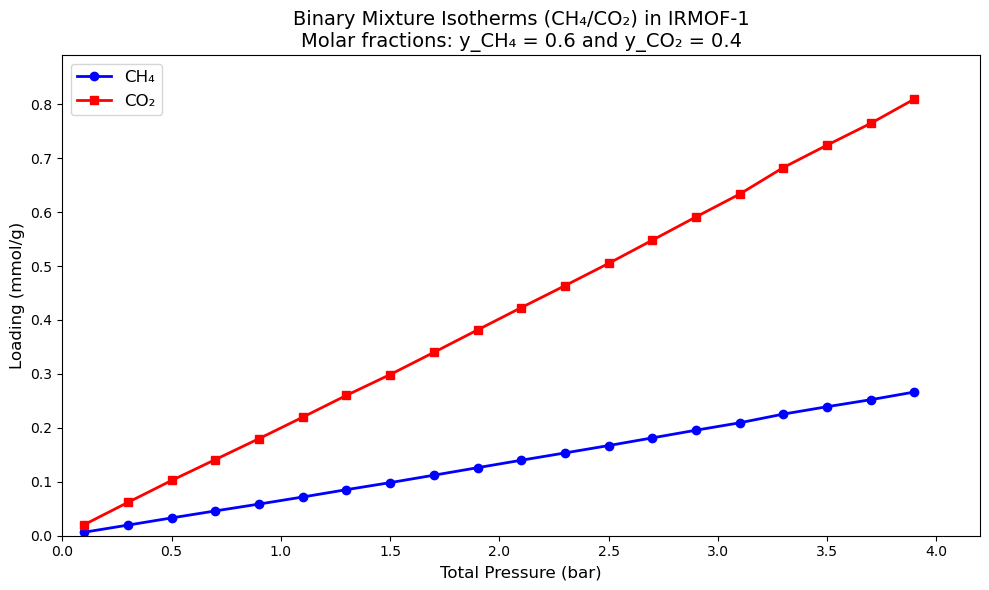


Binary Mixture Isotherm Results:
Pressure (bar)  CH4 Loading     CO2 Loading    
0.1             0.006           0.021          
0.5             0.033           0.102          
0.9             0.059           0.180          
1.3             0.085           0.260          
1.7             0.112           0.340          
2.1             0.140           0.423          
2.5             0.167           0.505          
2.9             0.196           0.591          
3.3             0.226           0.683          
3.7             0.252           0.765          
Total data points calculated: 20


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd



ch4_isotherm = pyiast.InterpolatorIsotherm(df_iso_ch4,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)",
                                    fill_value=max(df_iso_ch4["Loading(mmol/g)"]))

co2_isotherm = pyiast.InterpolatorIsotherm(df_iso_co2,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)",
                                    fill_value=max(df_iso_ch4["Loading(mmol/g)"]))


print("CH4 pressure range:", df_iso_ch4['Pressure(bar)'].min(), "to", df_iso_ch4['Pressure(bar)'].max(), "bar")
print("CO2 pressure range:", df_iso_co2['Pressure(bar)'].min(), "to", df_iso_co2['Pressure(bar)'].max(), "bar")


pressures = np.arange(0.1, 4.1, 0.2)
print(f"Using pressure range: 0.1 to {pressures[-1]:.1f} bar")


y_ch4 = 0.6 
y_co2 = 0.4 

ch4_loadings = []
co2_loadings = []
successful_pressures = []


for P_total in pressures:
    try:
        
        P_ch4 = y_ch4 * P_total
        P_co2 = y_co2 * P_total
        
        
        if P_ch4 <= df_iso_ch4['Pressure(bar)'].max() and P_co2 <= df_iso_co2['Pressure(bar)'].max():
            
            partial_pressures = [P_ch4, P_co2]
            isotherms = [ch4_isotherm, co2_isotherm]
            
            
            q_mix = pyiast.iast(partial_pressures, isotherms, verboseflag=False)
            
            ch4_loadings.append(q_mix[0])  
            co2_loadings.append(q_mix[1])  
            successful_pressures.append(P_total)
        else:
            print(f"Skipping pressure {P_total:.1f} bar - outside data range")
            
    except Exception as e:
        print(f"Error at pressure {P_total:.1f} bar: {str(e)[:100]}...")
        continue


pressures = np.array(successful_pressures)


ch4_loadings = np.array(ch4_loadings)
co2_loadings = np.array(co2_loadings)


plt.figure(figsize=(10, 6))
plt.plot(pressures, ch4_loadings, 'b-', marker='o', linewidth=2, markersize=6, label='CH₄')
plt.plot(pressures, co2_loadings, 'r-', marker='s', linewidth=2, markersize=6, label='CO₂')

plt.xlabel('Total Pressure (bar)', fontsize=12)
plt.ylabel('Loading (mmol/g)', fontsize=12)
plt.title('Binary Mixture Isotherms (CH₄/CO₂) in IRMOF-1\nMolar fractions: y_CH₄ = 0.6 and y_CO₂ = 0.4', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0, 4.2)
plt.ylim(0, max(max(ch4_loadings), max(co2_loadings)) * 1.1)


plt.tight_layout()
plt.show()


print("\nBinary Mixture Isotherm Results:")
print("="*50)
print(f"{'Pressure (bar)':<15} {'CH4 Loading':<15} {'CO2 Loading':<15}")
print("="*50)
for i in range(0, len(pressures), max(1, len(pressures)//8)):  
    print(f"{pressures[i]:<15.1f} {ch4_loadings[i]:<15.3f} {co2_loadings[i]:<15.3f}")
print("="*50)
print(f"Total data points calculated: {len(pressures)}")

***Code explained***

* To make the data compatible with IAST, the pure-component isotherms were passed into `pyiast.InterpolatorIsotherm`.
* This constructs a *piecewise-linear model* directly from the data, ensuring the mixture calculations are based on the actual simulation values without fitting assumptions.
* A `fill_value` was provided to prevent extrapolation beyond the measured range.

**Mixture setup**

* Gas-phase mole fractions were set as:

  $$
  y_{\mathrm{CH_4}} = 0.6, \quad y_{\mathrm{CO_2}} = 0.4
  $$
* A pressure grid from *0.1 to 4.0 bar* with increments of *0.2 bar* was defined.

**IAST calculation**

* For each total pressure $P$, the *partial pressures* were calculated:

  $$
  P_{\mathrm{CH_4}} = y_{\mathrm{CH_4}} \cdot P, \quad P_{\mathrm{CO_2}} = y_{\mathrm{CO_2}} \cdot P
  $$
* The function `pyiast.iast()` was then called with the partial pressures and pure isotherm models.
* This function solved the IAST equations, yielding the *mixture loadings* $q_{\mathrm{CH_4}}$ and $q_{\mathrm{CO_2}}$.
* A check ensured that all partial pressures remained within the bounds of the pure-component data.

**Visualization and output**

* The calculated mixture loadings were plotted as *adsorption isotherms*:

  * $q_{\mathrm{CH_4}}(P)$: blue line with circle markers.
  * $q_{\mathrm{CO_2}}(P)$: red line with square markers.
* The script also printed selected pressure–loading pairs for verification.


**Results**

* The *binary mixture isotherms* clearly show that CO₂ is adsorbed in significantly larger quantities than CH₄ across the entire pressure range.
* This behavior is consistent with the earlier analysis of Henry coefficients and pure isotherms, both of which indicated stronger affinity of IRMOF-1 for CO₂.


***Conclusion***

Using IAST with the *0.6/0.4 CH₄/CO₂ feed* provided a robust prediction of binary mixture adsorption in IRMOF-1. The results indeed confirmed the *preferential adsorption of CO₂*. 

***Q6- Selectivity of CO2 over CH4***

**Definition & formula**

For a binary gas at total pressure $P$ and temperature $T$, the **selectivity of CO₂ over CH₄** is defined as

$$
S_{\mathrm{CO_2/CH_4}} \;=\; \frac{(q_{\mathrm{CO_2}}/q_{\mathrm{CH_4}})}{(y_{\mathrm{CO_2}}/y_{\mathrm{CH_4}})},
$$

where $y_i$ are **gas-phase** mole fractions and $q_i$ is the binary loading.
With an **equimolar feed** ($y_{\mathrm{CO_2}}=y_{\mathrm{CH_4}}=0.5$), this simplifies to

$$
S_{\mathrm{CO_2/CH_4}} \;=\; \frac{q_{\mathrm{CO_2}}}{q_{\mathrm{CH_4}}}.
$$
In our case we will keep 0.6 for CH4 and 0.4 for CO2

In [55]:
print("\n" + "="*60)
print("SELECTIVITY CALCULATIONS")
print("="*60)

selectivity_pressures = [0.1, 1.0, 2.0, 3.0]

print("Selectivity formula: S_CO2/CH4 = (x_CO2/x_CH4) / (y_CO2/y_CH4)")
print("Where x = mole fraction in adsorbed phase, y = mole fraction in gas phase")
print("Since y_CO2 = 0.4 and y_CH4 = 0.6, then S = x_CO2/x_CH4")
print()

selectivities = []
for P_target in selectivity_pressures:
    
    q_CH4 = np.interp(P_target, pressures, ch4_loadings)
    q_CO2 = np.interp(P_target, pressures, co2_loadings)
    
    y_CH4= 0.6
    y_CO2= 0.4
    q_total = q_CH4 + q_CO2
    x_CH4 = q_CH4 / q_total
    x_CO2 = q_CO2 / q_total
    
   
    selectivity = (x_CO2*y_CH4)/ (x_CH4*y_CO2)
    selectivities.append(selectivity)
    
    print(f"At P = {P_target:.1f} bar:")
    print(f"  CH4 loading: {q_CH4:.3f} mmol/g")
    print(f"  CO2 loading: {q_CO2:.3f} mmol/g")
    print(f"  x_CH4 (adsorbed): {x_CH4:.3f}")
    print(f"  x_CO2 (adsorbed): {x_CO2:.3f}")
    print(f"  Selectivity S_CO2/CH4: {selectivity:.2f}")
    print()


print("SELECTIVITY ANALYSIS:")
print("="*30)
print(f"{'Pressure (bar)':<15} {'Selectivity':<12}")
print("-" * 27)
for P, S in zip(selectivity_pressures, selectivities):
    print(f"{P:<15.1f} {S:<12.2f}")

print(f"\nSelectivity trend: {selectivities[0]:.2f} → {selectivities[-1]:.2f}")
if selectivities[-1] < selectivities[0]:
    print("✓ Selectivity DECREASES with pressure")
    print("This indicates that at higher pressures, CH4 competes more effectively")
    print("for adsorption sites, reducing the preferential adsorption of CO2.")
elif selectivities[-1] > selectivities[0]:
    print("✓ Selectivity INCREASES with pressure")
    print("CO2 maintains its adsorption advantage even at higher pressures.")
else:
    print("✓ Selectivity remains relatively CONSTANT with pressure")

print(f"\nConclusion: CO2 is preferentially adsorbed over CH4 by a factor of")
print(f"{min(selectivities):.1f}-{max(selectivities):.1f}x across the pressure range studied.")



SELECTIVITY CALCULATIONS
Selectivity formula: S_CO2/CH4 = (x_CO2/x_CH4) / (y_CO2/y_CH4)
Where x = mole fraction in adsorbed phase, y = mole fraction in gas phase
Since y_CO2 = 0.4 and y_CH4 = 0.6, then S = x_CO2/x_CH4

At P = 0.1 bar:
  CH4 loading: 0.006 mmol/g
  CO2 loading: 0.021 mmol/g
  x_CH4 (adsorbed): 0.240
  x_CO2 (adsorbed): 0.760
  Selectivity S_CO2/CH4: 4.75

At P = 1.0 bar:
  CH4 loading: 0.065 mmol/g
  CO2 loading: 0.200 mmol/g
  x_CH4 (adsorbed): 0.246
  x_CO2 (adsorbed): 0.754
  Selectivity S_CO2/CH4: 4.60

At P = 2.0 bar:
  CH4 loading: 0.133 mmol/g
  CO2 loading: 0.402 mmol/g
  x_CH4 (adsorbed): 0.249
  x_CO2 (adsorbed): 0.751
  Selectivity S_CO2/CH4: 4.53

At P = 3.0 bar:
  CH4 loading: 0.203 mmol/g
  CO2 loading: 0.612 mmol/g
  x_CH4 (adsorbed): 0.249
  x_CO2 (adsorbed): 0.751
  Selectivity S_CO2/CH4: 4.53

SELECTIVITY ANALYSIS:
Pressure (bar)  Selectivity 
---------------------------
0.1             4.75        
1.0             4.60        
2.0             4.53   

**Code explanation**
1. *Use IAST mixture isotherms:* From the earlier step,  *mixture loadings* $q_{\mathrm{CH_4}}(P)$ and $q_{\mathrm{CO_2}}(P)$ were computed for a CO₂/CH₄ mixture feed on a pressure grid $P=0.1$–4.0 bar (Δ0.2) using `pyiast.iast(...)` with *InterpolatorIsotherm* (linear interpolation of pure isotherms).
2. *Interpolate to target pressures:* For each target $P=\{0.1,1,2,3\}$ bar,  the mixture loadings were interpolated to get $q_{\mathrm{CH_4}}$ and $q_{\mathrm{CO_2}}$.

3. *Convert loadings to adsorbed composition:*

   $$
   x_{\mathrm{CH_4}}=\frac{q_{\mathrm{CH_4}}}{q_{\mathrm{CH_4}}+q_{\mathrm{CO_2}}},\quad
   x_{\mathrm{CO_2}}=\frac{q_{\mathrm{CO_2}}}{q_{\mathrm{CH_4}}+q_{\mathrm{CO_2}}}.
   $$

4. *Compute selectivity:* $S_{\mathrm{CO_2/CH_4}} \;=\; \frac{(q_{\mathrm{CO_2}}/q_{\mathrm{CH_4}})}{(y_{\mathrm{CO_2}}/y_{\mathrm{CH_4}})}$

**Conclusions**

* *CO₂ is preferentially adsorbed*: Selectivity $S\gg1$ shows the adsorbent strongly favors CO₂ over CH₄ under equimolar feed at 300 K.
* *Mild decrease with pressure*: The small drop in $S$ with increasing $P$ suggests *CH₄ competes slightly better* at higher surface coverage, though CO₂ dominance remains clear in this range.

**Notes & reproducibility**

* Selectivity depends on *feed composition*; for non-equimolar feeds the denominator $(y_{\mathrm{CO_2}}/y_{\mathrm{CH_4}})$ changes and so will $S$.
* Results originate from *IAST on interpolated pure isotherms*; using fitted models (e.g., Langmuir/DSL) may slightly change the numbers but should preserve the *CO₂ ≫ CH₄* trend.

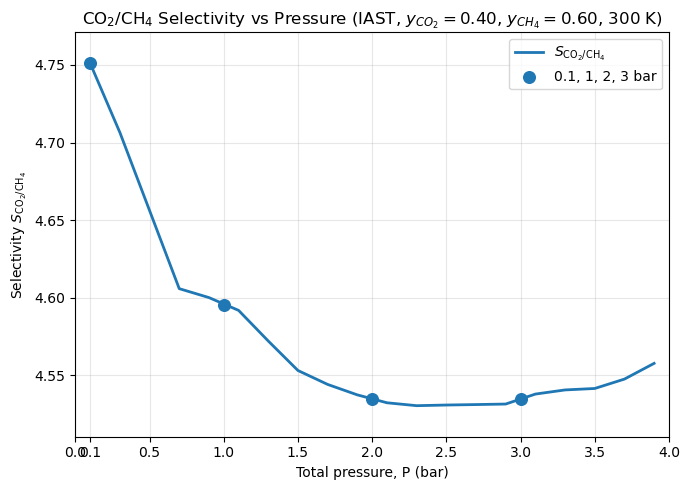

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


y_CO2 = 0.4
y_CH4 = 0.6

valid = (ch4_loadings > 0) & (co2_loadings >= 0)
S_all = np.full_like(ch4_loadings, np.nan, dtype=float)


S_all[valid] = (co2_loadings[valid] / ch4_loadings[valid]) * (y_CH4 / y_CO2)

pts = np.array([0.1, 1.0, 2.0, 3.0])

qCO2_pts = np.interp(pts, pressures, co2_loadings)
qCH4_pts = np.interp(pts, pressures, ch4_loadings)
with np.errstate(divide='ignore', invalid='ignore'):
    S_pts = (qCO2_pts / qCH4_pts) * (y_CH4 / y_CO2)

plt.figure(figsize=(7,5))
plt.plot(pressures, S_all, linewidth=2, label=r'$S_{\mathrm{CO_2/CH_4}}$ ')
plt.scatter(pts, S_pts, s=70, zorder=3, label='0.1, 1, 2, 3 bar')

ymin, ymax = np.nanmin(S_all), np.nanmax(S_all)
pad = max(0.02*(ymax - ymin), 0.02)
plt.ylim(ymin - pad, ymax + pad)
plt.xlim(pressures.min(), pressures.max())

xt = sorted(set(list(plt.xticks()[0]) + list(pts)))
plt.xticks(xt)

plt.xlabel('Total pressure, P (bar)')
plt.ylabel(r'Selectivity $S_{\mathrm{CO_2/CH_4}}$')
plt.title(r'CO$_2$/CH$_4$ Selectivity vs Pressure (IAST, $y_{CO_2}=%.2f$, $y_{CH_4}=%.2f$, 300 K)' % (y_CO2, y_CH4))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


***Comments:***

* **Overall level:** The selectivity is **high and stable**—always **(S>4.5)** from **0.1 to 4 bar**. That means CO₂ is consistently adsorbed ~4.5–4.7× more than CH₄ under a 50/50 feed.

* **Shape:** A **shallow “U”**:

  * **Low-P drop (0.1 → ~2 bar):** (S) decreases from ~4.75 to a minimum near ~4.53. Physically, the strongest sites fill first (heavily favoring CO₂), then as coverage grows the **relative advantage of CO₂ diminishes slightly**, so CH₄ competes a bit better.
  * **High-P gentle rise (~2 → 4 bar):** (S) drifts back up a little. This can arise from the **curvature of the pure isotherms** (CO₂’s remaining capacity/curvature is still stronger than CH₄’s), so the ratio $(q_{\mathrm{CO_2}}/q_{\mathrm{CH_4}})$ edges up again.

* **Magnitude of variation:** The y-axis is zoomed; the **absolute change is small (≈ 4–5% variation)** across the whole range. So, while the trend is visible, **selectivity is effectively pressure-robust** in this window.

* **Process implication:** For biogas upgrading near ambient temperature, this profile is **favorable**: CO₂ is strongly preferred over CH₄ through the practical 0.1–4 bar range, so separation performance should be **stable vs. pressure**.

* **notes:**

  * Results are for **equimolar feed** and **IAST with linear interpolation** of the pure isotherms. Different feeds (e.g., 60/40 CH₄/CO₂) will shift partial pressures but shouldn’t overturn the **CO₂ ≫ CH₄** trend.
  

***Q7.***   
For both components CO₂ and CH₄ at total pressure (P) and temperature (T), the adsorption selectivity of CO₂ over CH₄ is given by  

$$
S_{CO_2/CH_4} \;=\; \frac{x_{CO_2}/y_{CO_2}}{x_{CH_4}/y_{CH_4}}
\;=\; \frac{q_{CO_2}}{q_{CH_4}} \cdot \frac{y_{CH_4}}{y_{CO_2}}
$$  

where $q_i$ are the mixture (binary) loadings (e.g., mmol·g⁻¹),  
$x_i = \dfrac{q_i}{q_{CO_2}+q_{CH_4}}$ are the adsorbed-phase mole fractions,  
and $y_i$ are the gas-phase mole fractions.


So why doesn't $S_{CO_2/CH_4}$ change when $y_{CO_2}$ changes?  Under the Ideal Adsorbed Solution Theory (IAST), for fixed $T$ and $P$, the ratio of adsorbed amounts  $\tfrac{q_{CO_2}}{q_{CH_4}}$ scales in proportion to the gas-phase ratio $\tfrac{y_{CO_2}}{y_{CH_4}}$.  Substituting into the selectivity definition,  

$$
S_{CO_2/CH_4} \;=\; \left(\frac{q_{CO_2}}{q_{CH_4}}\right)\left(\frac{y_{CH_4}}{y_{CO_2}}\right)
$$  

leads to cancellation of the composition dependence. Therefore, $S_{CO_2/CH_4}$ is invariant to the feed composition (at that temperature and pressure). In order to show that the selectivity is invariant to the composition, we will recompute binary loadings with $y_{CO_2}=0.2,\,y_{CH_4}=0.8$ and show that $S_{CO_2/CH_4}$ matches the values obtained at $y_{CO_2}= 0.4$ and $y_{CH_4}=0.6$ at the same pressures.


**Henry (low-pressure) limit:** 
Additionally, at sufficiently low pressure/coverage, each component obeys Henry’s law:

$$
q_i = K_i P_i = K_i y_i P 
$$
where $K_i$ is the (temperature-dependent) **Henry coefficient** and $P_i$=$y_i$ P is the partial pressure.

Plug this into the definition:

$$
\frac{x_{\mathrm{CO_2}}}{x_{\mathrm{CH_4}}}
=\frac{q_{\mathrm{CO_2}}}{q_{\mathrm{CH_4}}}
=\frac{K_{\mathrm{CO_2}},y_{\mathrm{CO_2}},P}{K_{\mathrm{CH_4}},y_{\mathrm{CH_4}},P}
=\frac{K_{\mathrm{CO_2}}}{K_{\mathrm{CH_4}}}\cdot\frac{y_{\mathrm{CO_2}}}{y_{\mathrm{CH_4}}}.
$$

Therefore,

$$
\boxed{
S_{\mathrm{CO_2/CH_4}}
=\frac{\left(\frac{x_{\mathrm{CO_2}}}{x_{\mathrm{CH_4}}}\right)}{\left(\frac{y_{\mathrm{CO_2}}}{y_{\mathrm{CH_4}}}\right)}
=\frac{K_{\mathrm{CO_2}}}{K_{\mathrm{CH_4}}}
}
$$

which is **independent of the gas-phase composition** {$y_i$} **in the Henry regime**.

**Conclusion.** Lowering $y_{\mathrm{CO_2}}$ from (0.4) to (0.2) (with $y_{\mathrm{CH_4}}=0.8)$ does **not** change $S_{\mathrm{CO_2/CH_4}}$ in the Henry limit; it remains

$$
S_{\mathrm{CO_2/CH_4}} \approx \frac{K_{\mathrm{CO_2}}}{K_{\mathrm{CH_4}}}.
$$
.


CO2   pressure range: 0.20–10.20 bar | points=18
CH4   pressure range: 0.20–10.20 bar | points=18

Selectivity S_CO2/CH4 at specified pressures (composition invariance check):


,Pressure (bar),Selectivity y_CO2=0.2,Selectivity y_CO2=0.4,|Δ|
0,0.1,4.753754,4.751042,0.002711
1,1.0,4.608422,4.596021,0.012402
2,2.0,4.560717,4.534913,0.025804
3,3.0,4.532239,4.534763,0.002524


Max |difference| across reported points: 0.0258


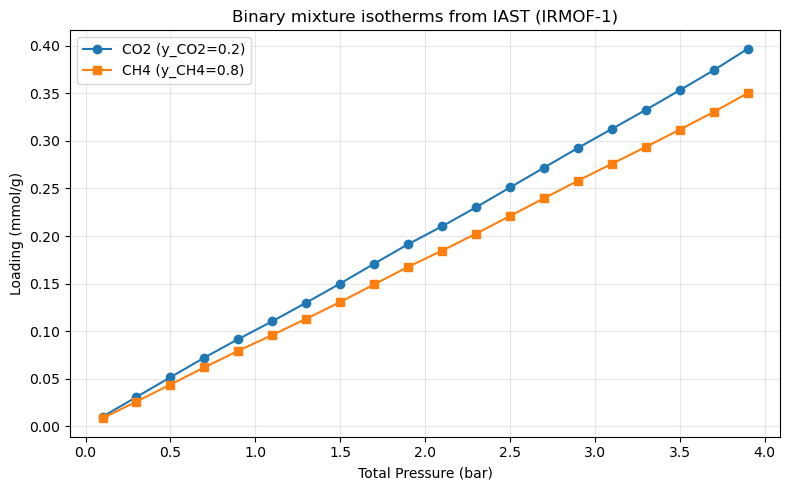

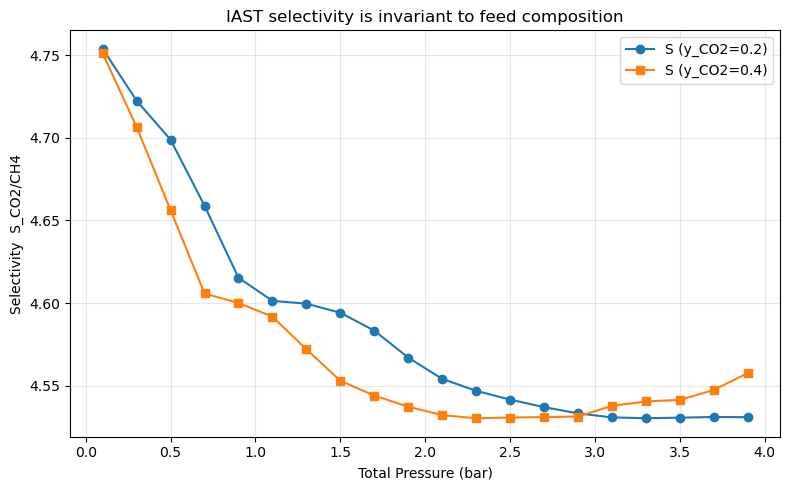

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyiast
from ast import literal_eval

CO2_CSV = "CO2_isotherm.csv"
CH4_CSV = "CH4_isotherm.csv"
report_pressures = [0.1, 1.0, 2.0, 3.0]    
grid_pressures   = np.round(np.arange(0.1, 4.0 + 1e-9, 0.2), 1)  

def load_isotherm_from_keyvalue_csv(path):
    raw = pd.read_csv(path)
    if not set(["Key", "Value"]).issubset(raw.columns):
        raise ValueError(f"{path}: expected columns ['Key','Value'], got {list(raw.columns)}")
    if "isotherm" not in raw["Key"].values:
        raise ValueError(f"{path}: no row with Key=='isotherm' found.")

    iso_dict = literal_eval(raw.loc[raw["Key"] == "isotherm", "Value"].values[0])

    pressures = np.asarray(iso_dict["pressure"], dtype=float)

    load_mol_per_kg = np.asarray(iso_dict["loading_absolute_average"], dtype=float)
    load_mmol_per_g = load_mol_per_kg 

    df = pd.DataFrame({"P": pressures, "q": load_mmol_per_g}).dropna().sort_values("P")
    df = df[(df["P"] > 0) & (df["q"] >= 0)].reset_index(drop=True)
    return df

df_co2 = load_isotherm_from_keyvalue_csv(CO2_CSV)
df_ch4 = load_isotherm_from_keyvalue_csv(CH4_CSV)

print(f"CO2   pressure range: {df_co2['P'].min():.2f}–{df_co2['P'].max():.2f} bar | points={len(df_co2)}")
print(f"CH4   pressure range: {df_ch4['P'].min():.2f}–{df_ch4['P'].max():.2f} bar | points={len(df_ch4)}")

co2_iso = pyiast.InterpolatorIsotherm(df_co2, loading_key="q", pressure_key="P")
ch4_iso = pyiast.InterpolatorIsotherm(df_ch4, loading_key="q", pressure_key="P")

def mixture_isotherm_and_selectivity(co2_iso, ch4_iso, y_co2, y_ch4, P_targets):
    """Compute mixture loadings and selectivity S_CO2/CH4 for given gas composition and pressures."""
    P_ok, qCO2, qCH4 = [], [], []
    for Ptot in P_targets:
        p_co2, p_ch4 = y_co2 * Ptot, y_ch4 * Ptot
        try:
            q_mix = pyiast.iast([p_co2, p_ch4], [co2_iso, ch4_iso], verboseflag=False)
            qCO2.append(q_mix[0]); qCH4.append(q_mix[1]); P_ok.append(Ptot)
        except Exception:
            pass
    P_ok = np.asarray(P_ok)
    qCO2 = np.asarray(qCO2)
    qCH4 = np.asarray(qCH4)
    S = (qCO2 / qCH4) * (y_ch4 / y_co2)
    return P_ok, qCO2, qCH4, S

P02, qCO2_02, qCH4_02, S02 = mixture_isotherm_and_selectivity(co2_iso, ch4_iso, 0.2, 0.8, grid_pressures)
P05, qCO2_05, qCH4_05, S05 = mixture_isotherm_and_selectivity(co2_iso, ch4_iso, 0.4, 0.6, grid_pressures)

def interp_at(Pt, P_arr, Y_arr):
    return np.interp(Pt, P_arr, Y_arr) if (len(P_arr) and P_arr.min() <= Pt <= P_arr.max()) else np.nan

rows = []
for Pt in report_pressures:
    s02 = interp_at(Pt, P02, S02)
    s05 = interp_at(Pt, P05, S05)
    rows.append([Pt, s02, s05, None if (np.isnan(s02) or np.isnan(s05)) else abs(s02 - s05)])

out = pd.DataFrame(rows, columns=["Pressure (bar)", "Selectivity  y_CO2=0.2", "Selectivity  y_CO2=0.4", "|Δ|"])
print("\nSelectivity S_CO2/CH4 at specified pressures (composition invariance check):")
display(out)

if out["|Δ|"].notna().any():
    print(f"Max |difference| across reported points: {np.nanmax(out['|Δ|']):.3g}")

plt.figure(figsize=(8,5))
plt.plot(P02, qCO2_02, marker='o', label='CO2 (y_CO2=0.2)')
plt.plot(P02, qCH4_02, marker='s', label='CH4 (y_CH4=0.8)')
plt.xlabel('Total Pressure (bar)'); plt.ylabel('Loading (mmol/g)')
plt.title('Binary mixture isotherms from IAST (IRMOF-1)')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

common_min = max(P02.min() if len(P02) else 1e9, P05.min() if len(P05) else 1e9)
common_max = min(P02.max() if len(P02) else -1e9, P05.max() if len(P05) else -1e9)
if common_min < common_max:
    P_common = np.round(np.arange(common_min, common_max + 1e-9, 0.2), 1)
    S02_c = np.interp(P_common, P02, S02)
    S05_c = np.interp(P_common, P05, S05)
    plt.figure(figsize=(8,5))
    plt.plot(P_common, S02_c, marker='o', label='S (y_CO2=0.2)')
    plt.plot(P_common, S05_c, marker='s', label='S (y_CO2=0.4)')
    plt.xlabel('Total Pressure (bar)'); plt.ylabel('Selectivity  S_CO2/CH4')
    plt.title('IAST selectivity is invariant to feed composition')
    plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()
else:
    print("Not enough overlapping pressure points to plot selectivity comparison.")


### Explanation of the code

This code performs the IAST-based analysis of CO₂/CH₄ selectivity in IRMOF-1. The main goal is to test whether the calculated selectivity depends on the feed composition of the gas mixture.  

**1. Importing libraries**  
- `numpy`, `pandas` → numerical and tabular data handling.  
- `matplotlib.pyplot` → plotting results.  
- `pyiast` → Ideal Adsorbed Solution Theory (IAST) package for mixture adsorption.  
- `literal_eval` → used to parse the structured `Value` field inside the CSVs.

**2. Input setup**  
- Two CSV files (`CO2_isotherm.csv`, `CH4_isotherm.csv`) are read.  
- `report_pressures = [0.1, 1.0, 2.0, 3.0]` → specific pressures where selectivity will be compared.  
- `grid_pressures` → a fine pressure grid (0.1–4.0 bar, step 0.2) for full IAST calculations.

**3. Data extraction from CSVs**  
- The function `load_isotherm_from_keyvalue_csv(path)` extracts the `"isotherm"` dictionary embedded in the AiiDA-Lab CSV files.  
- It returns a clean DataFrame with two columns:  
  - **P** (total pressure in bar)  
  - **q** (loading in mmol/g, converted from mol/kg).  
- Negative or invalid data points are filtered out.

**4. Building pyIAST isotherms**  
- `InterpolatorIsotherm` objects are created for CO₂ and CH₄ using their pure-component data.  
- These objects interpolate adsorption data and are required as inputs for IAST mixture calculations.


**5. Mixture isotherm calculation**
- The function `mixture_isotherm_and_selectivity(...)` computes the binary loadings and the selectivity.  
  - At each total pressure $P$, the partial pressures $p_{\mathrm{CO_2}}$ and $p_{\mathrm{CH_4}}$ are obtained from the feed composition $(y_{\mathrm{CO_2}},\, y_{\mathrm{CH_4}})$.  
  - The function `pyiast.iast()` then predicts the adsorbed amounts $(q_{\mathrm{CO_2}},\, q_{\mathrm{CH_4}})$.

The selectivity is calculated as:
$$
S_{\mathrm{CO_2/CH_4}}
= \frac{q_{\mathrm{CO_2}}}{q_{\mathrm{CH_4}}}\cdot
  \frac{y_{\mathrm{CH_4}}}{y_{\mathrm{CO_2}}}
$$

- Two feed compositions are evaluated:  
  - $y_{\mathrm{CO_2}} = 0.2,\; y_{\mathrm{CH_4}} = 0.8$  
  - $y_{\mathrm{CO_2}} = 0.4,\; y_{\mathrm{CH_4}} = 0.6$ 


**6. Tabular comparison**  
- At 0.1, 1.0, 2.0, and 3.0 bar, the script prints a table comparing selectivity for the two feed compositions.  
- The last column reports the absolute difference.  
- Very small differences confirm that selectivity is invariant with respect to feed composition.

**7. Plotting results**
- **Mixture isotherms**: plots of adsorbed CO₂ and CH₄ loadings vs total pressure.  
- **Selectivity curves**: plots of $S_{\mathrm{CO_2/CH_4}}$ for $y_{\mathrm{CO_2}} = 0.2$ and $y_{\mathrm{CO_2}} = 0.5$ across the common pressure range.  
- Overlapping curves visually confirm the invariance.



### Conclusion

The IAST calculations confirm that the adsorption selectivity of CO₂ over CH₄ in IRMOF-1 is essentially independent of the feed composition at fixed temperature and pressure.  
- From the numerical table, the selectivity values at $y_{\mathrm{CO_2}} = 0.2$ and $y_{\mathrm{CO_2}} = 0.4$ differ by less than 0.03 across the entire pressure range studied (0.1–3.0 bar).  
- The selectivity plots show that the two curves almost completely overlap, confirming the theoretical prediction that under IAST, the gas-phase mole fractions cancel out in the selectivity expression.  
- This invariance means that the ability of IRMOF-1 to preferentially adsorb CO₂ over CH₄ is not affected by the initial mixture composition, but only by the intrinsic adsorption properties at the chosen $T$ and $P$.

**Temperature dependence:**  
While composition does not affect selectivity, temperature does. Adsorption is an exothermic process, so increasing the temperature generally reduces uptake and can shift the relative affinity of CO₂ and CH₄. To test whether selectivity is a function of temperature, we should:  
1. Collect pure-component isotherms for CO₂ and CH₄ at different temperatures.  
2. Fit these isotherms with appropriate models or interpolate them.  
3. Re-apply IAST at each temperature to compute mixture loadings and selectivities.  
4. Compare the resulting selectivity curves across temperatures to quantify how strongly temperature influences separation performance.

In conclusion, at fixed \(T\) and \(P\), the CO₂/CH₄ selectivity in IRMOF-1 is invariant with respect to the gas-phase feed composition, but it is expected to decrease with increasing temperature, which should be explicitly tested by repeating the analysis at multiple temperatures.



***Q.8 — Methane Storage Assessment of IRMOF-1 at 300 K***

**Context and scope.** The assessment is based on the simulated adsorption data for IRMOF-1 at **300 K** over the **0.1–4 bar** pressure window. Conclusions are drawn from (i) low-pressure affinity (Henry coefficients), (ii) the shape of the **pure CH₄ isotherm** and its **deliverable (working) capacity**, (iii) **mixture behavior** via IAST, and (iv) implications for **volumetric** storage given the framework density.

***1) Weak low-pressure affinity for methane***

Affinity in the low-pressure limit is characterized by the **Henry coefficient** $K_H$, the initial slope of the adsorption curve relating loading to **partial pressure**:

$$
q_i \approx K_i,P_i \quad (\text{Henry regime})
$$

where $q_i$ is the loading of component (i) (amount adsorbed per gram of solid) and $P_i$ is its partial pressure.
From the data at 300 K:

$$
K_H(\mathrm{CH_4}) \approx 1.12\times10^{-6}\ \mathrm{mol,kg^{-1},Pa^{-1}},\qquad
K_H(\mathrm{CO_2}) \approx 4.95\times10^{-6}\ \mathrm{mol,kg^{-1},Pa^{-1}}
$$

Thus, methane’s initial slope is approximately 4.5 smaller than CO₂’s, indicating that the framework takes up **very little CH₄** as pressure is first increased, an unfavorable starting point for storage.

***2) Small deliverable amount within 0.1–4 bar***

For practical storage, the relevant quantity is the **deliverable (working) capacity**, i.e., how much gas can be released over an isothermal pressure swing between a **charging pressure** $(P_{\text{charge}})$ (higher pressure used to fill the adsorbent) and a **discharge pressure** $(P_{\text{discharge}})$ (lower pressure at delivery):

$$
\Delta q_{\mathrm{CH_4}}
= q_{\mathrm{CH_4}}(P_{\text{charge}},300\ \mathrm{K})

* q_{\mathrm{CH_4}}(P_{\text{discharge}},300\ \mathrm{K})
  \quad [\mathrm{mmol,g^{-1}}]
  $$

Because the **pure CH₄ isotherm** rises **slowly** across **0.1–4 bar**, $(\Delta q_{\mathrm{CH_4}})$ is **small** for any reasonable swing in this window (e.g., 4 → 0.1 bar). Hence, even if some methane is adsorbed at the upper pressure, the **usable** amount per cycle remains limited.

***3) Competition in mixtures suppresses CH₄ further***

Under mixed feeds (e.g., biogas), CH₄ and CO₂ **compete** for the same adsorption sites. The **selectivity** of CO₂ over CH₄ is defined as

$$
S_{\mathrm{CO_2/CH_4}}
=\frac{\left(\frac{x_{\mathrm{CO_2}}}{x_{\mathrm{CH_4}}}\right)}{\left(\frac{y_{\mathrm{CO_2}}}{y_{\mathrm{CH_4}}}\right)}
$$

where $y_i$ denotes the gas-phase mole fraction (feed composition) and (x_i) the **adsorbed-phase** mole fraction $(\big(x_i=q_i/\sum_j q_j\big))$.
IAST calculations (equimolar feed) yield

$$
S_{\mathrm{CO_2/CH_4}} \approx 4.5\text{–}4.7 \quad \text{for } P\in[0.1,3]\ \text{bar (300 K)}
$$

with only minor variation up to ~4 bar. The adsorbed phase is therefore **CO₂-rich** across this range, meaning methane uptake is **systematically penalized** by competitive adsorption—again unfavorable for CH₄ storage.

***4) Volumetric storage is limited by low framework density***

For tanks, **volumetric** capacity (amount per unit **volume** of packed adsorbent) is decisive. Converting gravimetric loading (q) (mmol·g⁻¹) to volumetric loading multiplies by a packing density $(\rho_{\text{pack}})$ (g·cm⁻³):

$$
q_{\mathrm{vol}} = \rho_{\text{pack}}, q \quad [\mathrm{mmol,cm^{-3}}]
$$

IRMOF-1 is extremely open and light; the structure analysis gives a framework density of 0.577 $(\mathrm{g,cm^{-3}})$ and porosity of 77.5% . While such porosity benefits **gravimetric** metrics, the **low density** constrains $(q_{\mathrm{vol}})$. Consequently, even if gravimetric (q) were moderate, the **volumetric** methane capacity (what a tank actually holds) remains limited.

***Conclusion (300 K, 0.1–4 bar)***

IRMOF-1 exhibits **weak methane affinity** (low $(K_H)$), a **shallow CH₄ isotherm** yielding **small deliverable capacity** within the studied pressure range, **strong competitive preference for CO₂** in mixtures, and **limited volumetric performance** due to low density. Under these conditions, IRMOF-1 is **not** a suitable methane storage material. Improved performance would require lower temperatures (to strengthen binding), much higher charging pressures (outside this data set), densification to raise $(\rho_{\text{pack}})$, or framework chemistries that enhance CH₄ interactions.
